In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [2]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [3]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

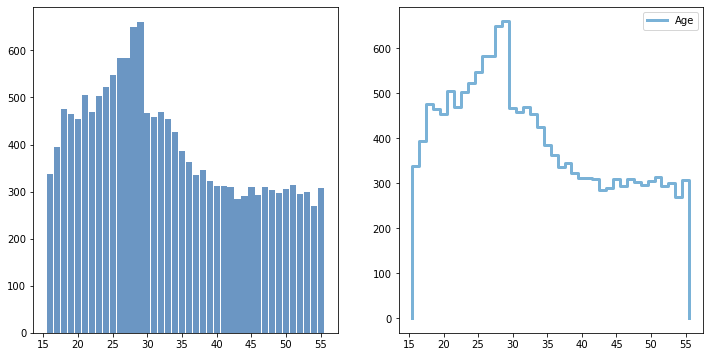

In [4]:
#Hist/PMF
histAge = thinkstats2.Hist(df["Age"], label="Age")
thinkplot.PrePlot(2,1,2)
thinkplot.Hist(histAge)
thinkplot.SubPlot(2)
thinkplot.Pmf(histAge)
thinkplot.Config()

#### What fraction of the people in the data are 51? What fraction are older than 51?

In [5]:
#Fractions at and above 51
#How many are 51?
age51 = histAge.Freq(51)

#Over 51
cdfAge = thinkstats2.Cdf(df["Age"])
over51 = 1-cdfAge.Prob(51)

print("Age 51 percentage:", (age51/df["Age"].count())*100)
print("Over 51 percentage:", round(over51*100))

Age 51 percentage: 1.963481740870435
Over 51 percentage: 7


##### What is the median age?

In [6]:
#Median age
"Median Age", df["Age"].median()

('Median Age', 31.0)

##### Does the distribution of the sample data seem to mirror the working age population?

I'd say the distribution looks reasonable-ish for the working age, maybe a bit young. I'd theorize this may be partially due to less post secondary education, lower life lengths, a greater proportion of defined benefit pensions, and lasting effects of the Vietnam war. The largest factor I'd think of is that more women didn't work after having children, and leaving the workforce in their 20s. This would need actual research to confirm. 

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [7]:
#Education distribution
round(df["Eduacation"].value_counts()/df["Eduacation"].count(), 2)

HighSchool            0.39
LessThanHighSchool    0.30
Intermediate          0.17
graduate              0.09
PostGraduate          0.06
Name: Eduacation, dtype: float64

In [8]:
#Race Distribution
round(df["Race"].value_counts()/df["Race"].count(), 2)

NotBlack    0.93
black       0.07
Name: Race, dtype: float64

In [9]:
#Hispanic Distributio
round(df["Hisp"].value_counts()/df["Hisp"].count(), 2)

NotHispanic    0.93
hispanic       0.07
Name: Hisp, dtype: float64

In [10]:
#Marital Status
round(df["MaritalStatus"].value_counts()/df["MaritalStatus"].count(), 2)

Married       0.71
NotMarried    0.29
Name: MaritalStatus, dtype: float64

In [11]:
#Degree Having-ness
round(df["Nodeg"].value_counts()/df["Nodeg"].count(), 2)

0    0.7
1    0.3
Name: Nodeg, dtype: float64

##### Demographic Conclusion

Overall these factors look pretty reasonable. 

I didn't really strictly critique if you thought it matched or didn't match the real stats of the US. The point really was just to look critically at the data, and assess if it makes sense for what we are using it for. I appologize for the overly specific wording of the question. 

### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

<AxesSubplot:ylabel='Density'>

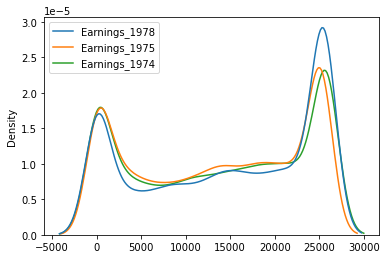

In [12]:
#Plot 3 earnings values
tmp = df[["Earnings_1978", "Earnings_1975", "Earnings_1974"]]
sns.kdeplot(data=tmp)


As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 

##### Effect Size

In [13]:
#NOTE: the effect size calculation gives a nan answer. 
#That's fine. We don't need to worry about fixing it. 
#Using a stats package returns the same thing. It has to do with binary data. 
#You can read this if you care: https://stats.stackexchange.com/questions/214378/how-to-treat-cohens-d-infinites-nans-calculated-using-binary-proportions-for-me 
#This wasn't a graded deal, you were not expected to do anything but run the function and get the answer. 

In [14]:
#Effect Size on earnings
dftmp = df[df["Earnings_1978"] > 0]

listOfStuff = [("Race", "Black", "NotBlack"), ("Hisp", "Hispanic", "NotHispanic"), ("MaritalStatus", "Married", "NotMarried"), ("Nodeg", 1, 0)]
for i in listOfStuff:
    tup = i
    df1 = dftmp[dftmp[tup[0]] == tup[1]]
    df2 = dftmp[dftmp[tup[0]] == tup[2]]
    df1 = pd.to_numeric(df1["Earnings_1978"], errors='coerce')
    df2 = pd.to_numeric(df2["Earnings_1978"], errors='coerce')
    print("Effect Size of "+tup[0], thinkstats2.CohenEffectSize(df1, df2))

#You could do this one by one, instead of a list of tuples, but typing is boring. 

Effect Size of Race nan
Effect Size of Hisp nan
Effect Size of MaritalStatus 0.790832979186224
Effect Size of Nodeg -0.5032843643246768


##### What to Investigate Further

The largest impact is marital status. I suspect this is due to people who earn more money in the 70s likely have their wives stay home, so it is self selecting. As well, I'd bet there were many fewer older people, in more senior roles, that were not married, compared to modern times. 

In reality, it is black/not black. We need to investigate further....

##### Histogram and PMF

In [15]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

In [16]:
#1978 Statistics Charts by Cohort, with median. 
listHist = cohort(df, "Race", "Hisp", "MaritalStatus", "Earnings_1978")
i=0
while i < len(listHist):
    thinkplot.PrePlot(2,1,2)
    h = listHist[i]
    print("Cohort -", h[1], "|----  Median Income:", h[2])
    thinkplot.Hist(h[0])
    thinkplot.SubPlot(2)
    thinkplot.Pmf(h[0])
    thinkplot.Config()
    thinkplot.Show()
    i = i + 1

NameError: name 'cohort' is not defined

##### Differences in Median Income, and Theory on Why

Not black, not hispanic, married people 'win' with a median income of ~$20400
Black, not hispanic, unmarried people check in at sub 8000. 

My theorized reason is pretty simple, and probably obvious - people are racist, especially 40+ years ago. 

##### Outliers

In [ ]:
#Outliers. 
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


Just by looking at the max values, there are no outliers on the high side. All the max values are low. The only thing really in question is if 0 is an outlier, or proper. 

I'd suspect that for this data it is fine, if we are analyzing income, lots of people earn 0. If we had any values for min/max that were super low/high, we'd graph a histogram and look at the tails to see if those are "detached" or if they are just part of the regular pattern of data. 

Functions used are below. 

In [ ]:
#Modification of cohort code to send back a tuple of results. 
#You could do this more manually as well.
def cohort(df_in, cohort1, cohort2, cohort3, earningsColumn):
    df_in["Cohort"] = (df_in[cohort1]+df_in[cohort2]+df_in[cohort3])
    cohortList = df_in["Cohort"].unique()
    i = 0
    resList = []
    while i < cohortList.size:
        tmp = df_in[df_in.Cohort == cohortList[i]]
        histTmp = thinkstats2.Hist(round(tmp[earningsColumn], -3))
        resList.append((histTmp, cohortList[i], tmp[earningsColumn].median()))
        i = i + 1
    return resList

In [ ]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)